# Kelompok 5
## Nama anggota:
### 1. Daffa Tedi Agustiansyah
### 2. Della Santika 
### 3. Ega Chandy Patisuan R.
### 4. M. Ridho Sampurna 
### 5. Nadila Rahmadinni
### 6. Paradika Dwi Oktaviansyah
### 7. Reza Mahesa Azandi
### 8. Sisca Indriyani
### 9. Tzalvano Syahputra Permana

sumber code : https://colab.research.google.com/drive/1_oR3fXbjFmp4ce4DzMj6feXSxcKbzyJm?usp=sharing#scrollTo=jyn7iNsIPNKV

# Implementing Particle Swarm Optimization using PySwarms

PySwarms adalah alat berbasis Python untuk optimasi gerombolan partikel. Ini digunakan oleh 
para peneliti, praktisi, dan siswa kecerdasan segerombolan yang ingin menggunakan antarmuka 
tingkat tinggi deklaratif untuk menerapkan PSO pada masalah mereka. PySwarms menawarkan interaksi

In [1]:
# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from IPython.display import HTML, Image
# Import Numpy
import numpy as np
# Import mathplot lib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher

Liblary yang diperlukan
1. PySwarms adalah toolkit penelitian yang dapat diperluas untuk optimasi gerombolan partikel (PSO) dengan Python. Ini ditujukan untuk para peneliti, praktisi, dan mahasiswa kecerdasan swarm yang lebih memilih antarmuka deklaratif tingkat tinggi untuk mengimplementasikan PSO dalam masalah mereka.
2. Matplotlib adalah pustaka plot untuk bahasa pemrograman Python dan ekstensi matematika numeriknya NumPy.
3. IPython (Interactive Python) adalah shell perintah untuk komputasi interaktif dalam beberapa bahasa pemrograman, awalnya dikembangkan untuk bahasa pemrograman Python, yang menawarkan introspeksi, media kaya, sintaks shell, penyelesaian tab, dan sejarah.

### Menyiapkan pengaturan PSO dan Menjalankan Optimizer PSO

Dalam ilmu komputasi , Particle swarm optimization ( PSO ) adalah metode komputasi yang mengoptimalkan masalah dengan iteratif mencoba untuk meningkatkan solusi kandidat berkaitan dengan ukuran kualitas yang diberikan. Ini memecahkan masalah dengan memiliki populasi solusi kandidat, di sini disebut partikel , dan memindahkan partikel-partikel ini di sekitar ruang pencarian sesuai dengan rumus matematika sederhana di atas posisi dan kecepatan partikel.

In [2]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=250)

2021-10-27 15:04:04,118 - pyswarms.single.global_best - INFO - Optimize for 250 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|250/250, best_cost=7.25e-15
2021-10-27 15:04:04,290 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.247891691194892e-15, best pos: [-8.50270878e-08  4.27621684e-09]


Dalam variabel set-up hyperparameters, terdapat:
1. c1 adalah self confidence.
2. c2 adalah swarm confidence.
3. w adalah beban.

Dalam optimizer PSO, terdapat:
1. n_particles adalah jumlah partikel dalam swarm, disini kami memakai 25 buah partikel.
2. dimensions adalah jenis dimensi itu sendiri. Disini kami memakai jenis dimensi ke-2.
3. options adalah pengaturan dari partikel swarm itu sendiri.

Dalam perform oprimization adalah proses optimisasi dari partikel swarm, kami disini memakai iters (pengulangan) 250 kali.

# Memplot Cost History

Untuk memplot riwayat biaya, kita cukup memperoleh cost_history dari kelas pengoptimal dan meneruskannya ke fungsi cost_history. Selanjutnya, metode ini juga menerima argumen kata kunci **kwargs yang mirip dengan matplotlib. Ini memungkinkan kami untuk lebih menyesuaikan berbagai seniman dan elemen dalam plot. Selain itu, kita dapat memperoleh sejarah berikut dari kelas yang sama:

1. mean_neighbor_history: rata-rata riwayat lokal terbaik dari semua tetangga selama pengoptimalan
2. mean_pbest_history: rata-rata pribadi terbaik dari partikel selama pengoptimalan

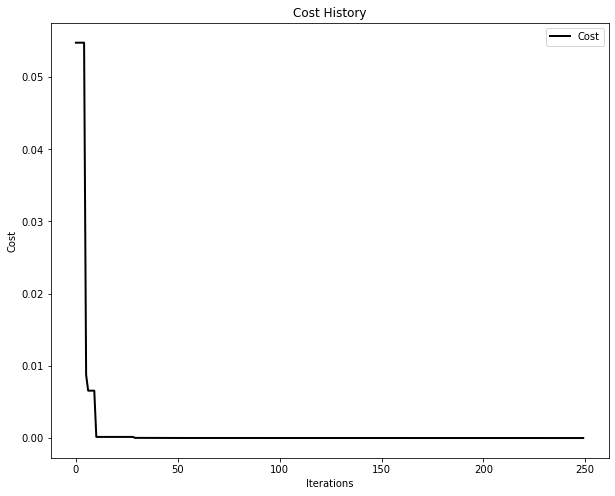

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

plot diatas merupakan hasil iterasi 250 kali tadi. Setelah proses iterasi itu telah lebih dari iterasi yang kita masukkan, maka tingkat optimisasi perulangannya menjadi 0.

### Menyiapkan dan menampilkan visualisasi PSO

Pada tingkatan pemodelan matematika, teknik visualisasi data sangat penting untuk dapat mengetahui karakteristik suatu data. Matlab menyediakan teknik visualisasi data hingga tiga dimensi.

Modul plotters menawarkan dua metode untuk melakukan animasi, plot_contour() dan plot_surface(). Seperti namanya, metode ini memplot partikel dalam ruang 2-D atau 3-D.

Setiap metode animasi mengembalikan kelas matplotlib.animation.Animation yang masih perlu dianimasikan oleh kelas Writer (sehingga memerlukan instalasi modul penulis). Untuk contoh selanjutnya, kami akan mengonversi animasi menjadi video HTML5. Dalam kasus seperti itu, kita perlu memanggil beberapa metode tambahan untuk melakukan hal itu.

In [4]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

Terakhir, akan lebih baik untuk menambahkan mesh di swarm kita untuk memplot fungsi sphere. Hal ini memungkinkan kita untuk secara visual mengenali di mana partikel berada sehubungan dengan fungsi tujuan kita. Kita bisa melakukannya dengan menggunakan kelas Mesher.

In [5]:
m = Mesher(func=fx.sphere)

## Animasi 2D

Kita dapat memperoleh riwayat posisi kawanan menggunakan atribut pos_history dari instance pengoptimal. Untuk memplot kontur 2D, cukup berikan ini bersama-sama dengan Mesher ke fungsi plot_contour(). Selain itu, kita juga dapat menandai minimum global dari fungsi bola, (0,0), untuk memvisualisasikan "target" kawanan.

2021-10-27 15:04:12,561 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-27 15:04:12,562 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'C:\Users\User\AppData\Local\Temp\tmpdg_7jgtq\temp.m4v'


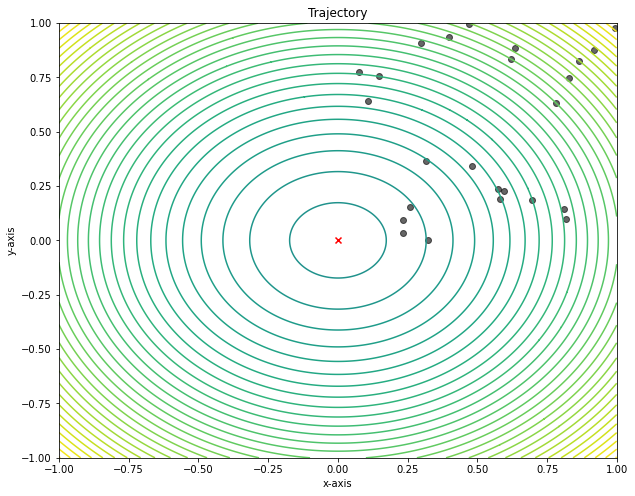

In [6]:
# Membuat Animasi
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0)) # Mark minima
# Line dibawah membuat kita melihat hasil animasi
HTML(animation.to_html5_video())

## Animasi 3D

Untuk memplot dalam ruang 3D, kita membutuhkan matriks posisi-fitness dengan bentuk (iterasi, n_partikel, 3). Dua kolom pertama menunjukkan posisi xy dari partikel, sedangkan kolom ketiga adalah kesesuaian posisi yang diberikan. Anda perlu mengaturnya sendiri, tetapi kami telah menyediakan fungsi pembantu untuk menghitung ini secara otomatis

2021-10-27 15:04:39,280 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-27 15:04:39,282 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'C:\Users\User\AppData\Local\Temp\tmpha0h1g0i\temp.m4v'


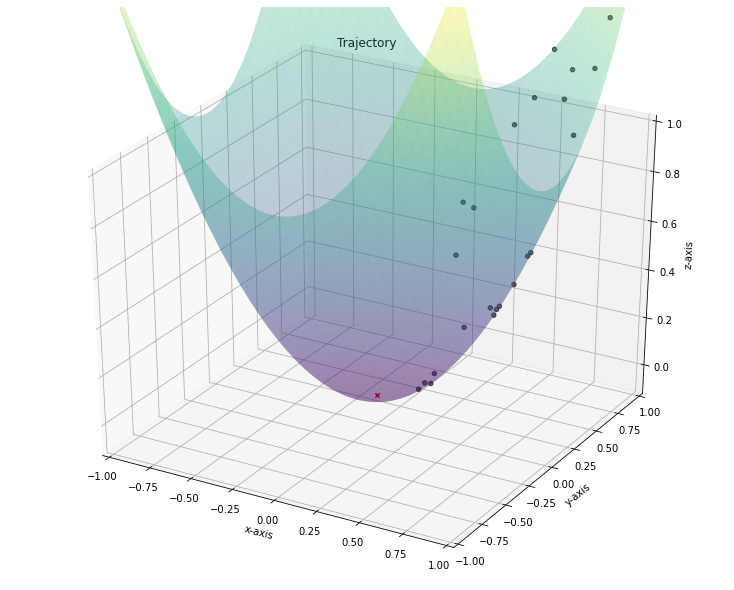

In [7]:
# PreProcessing
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
# Menyesuaikan Figur 3D 
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Membuat Animasi
animation3d = plot_surface(pos_history=pos_history_3d, 
                           mesher=m, designer=d,       
                           mark=(0,0,0))  # Mark minima
# Line dibawah membuat kita melihat hasil animasi
HTML(animation3d.to_html5_video())